In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/titanic2.csv")
df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.drop(['Cabin','Ticket','Name','PassengerId'],axis = 1,inplace = True)

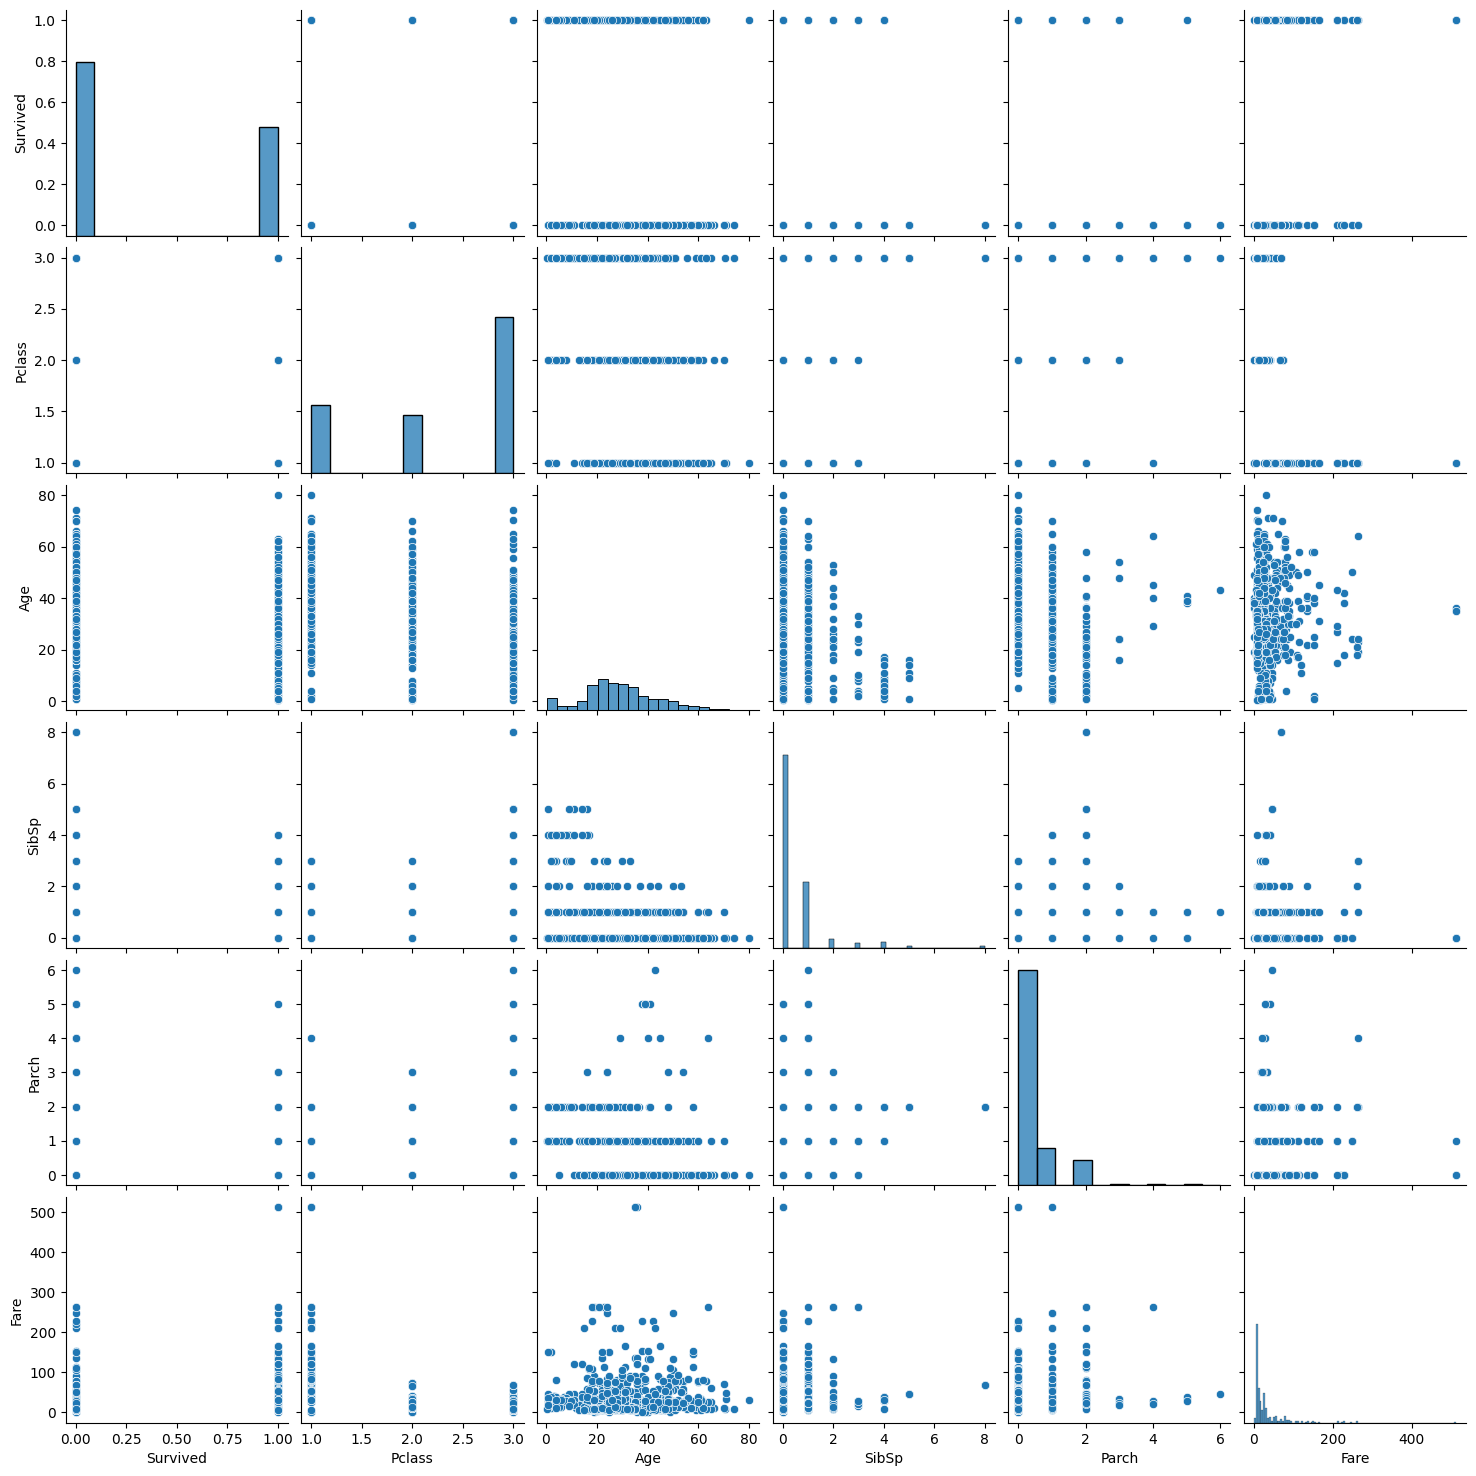

In [ ]:
sns.pairplot(df)
plt.show()

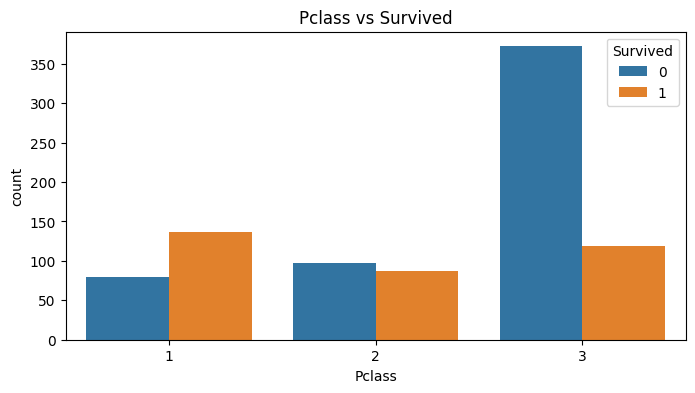

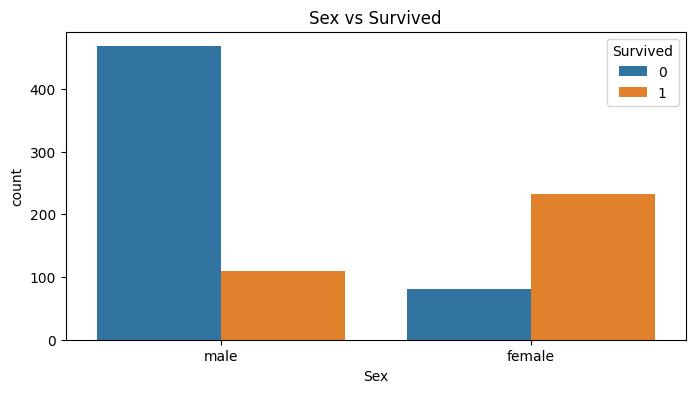

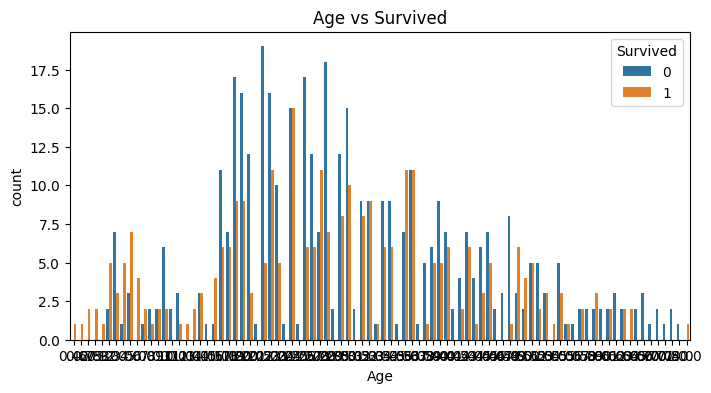

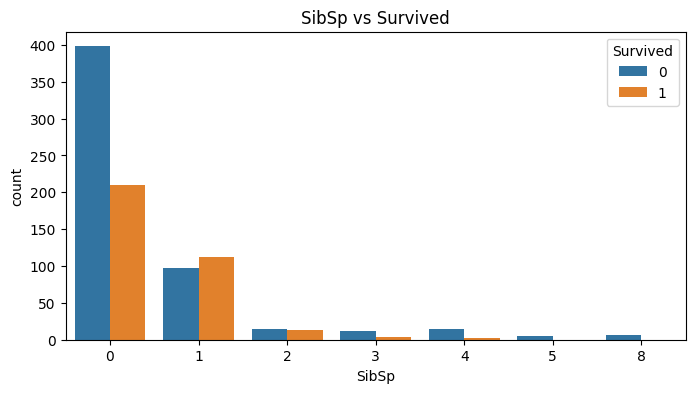

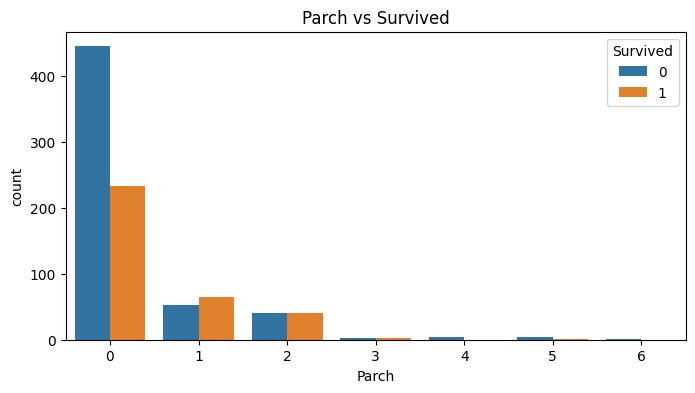

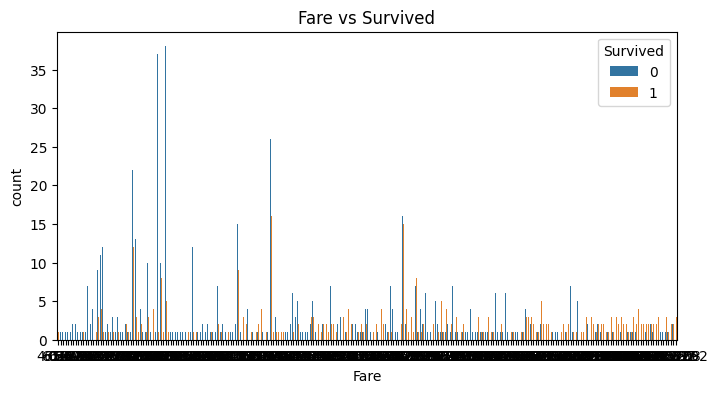

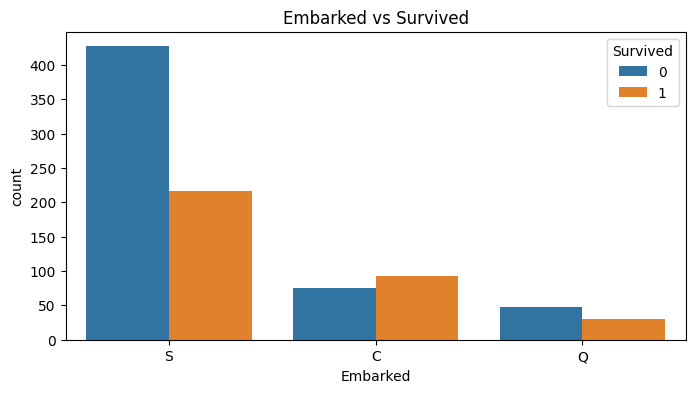

In [ ]:
for col in df.columns:
  if col != 'Survived':
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="Survived", data=df)
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title(f"{col} vs Survived")
    plt.show()

In [ ]:
def impute_fill(df,col,mean):
  df[col +'_mean'] = df[col].fillna(mean)
  return df
age_mean = df.Age.mean()
age = impute_fill(df,'Age',age_mean)

In [ ]:
df.drop(['Age'],axis = 1,inplace= True)

In [ ]:
df

,Survived,Pclass,SibSp,Parch,Fare,Age_mean,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.000000,True,False,True
1,1,1,1,0,71.2833,38.000000,False,False,False
2,1,3,0,0,7.9250,26.000000,False,False,True
3,1,1,1,0,53.1000,35.000000,False,False,True
4,0,3,0,0,8.0500,35.000000,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,True,False,True
887,1,1,0,0,30.0000,19.000000,False,False,True
888,0,3,1,2,23.4500,29.699118,False,False,True
889,1,1,0,0,30.0000,26.000000,True,False,False


In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df = pd.get_dummies(data=df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Fare        889 non-null    float64
 5   Age_mean    889 non-null    float64
 6   Sex_male    889 non-null    bool   
 7   Embarked_Q  889 non-null    bool   
 8   Embarked_S  889 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 51.2 KB


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
SibSp         0
Parch         0
Fare          0
Age_mean      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
X = df.drop(['Survived','Embarked_S'],axis = 1)
y = df['Survived']
print(X)
print(y)

     Pclass  SibSp  Parch     Fare   Age_mean  Sex_male  Embarked_Q
0         3      1      0   7.2500  22.000000      True       False
1         1      1      0  71.2833  38.000000     False       False
2         3      0      0   7.9250  26.000000     False       False
3         1      1      0  53.1000  35.000000     False       False
4         3      0      0   8.0500  35.000000      True       False
..      ...    ...    ...      ...        ...       ...         ...
886       2      0      0  13.0000  27.000000      True       False
887       1      0      0  30.0000  19.000000     False       False
888       3      1      2  23.4500  29.699118     False       False
889       1      0      0  30.0000  26.000000      True       False
890       3      0      0   7.7500  32.000000      True        True

[889 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=43,test_size=.30)

In [ ]:
lg = LogisticRegression(max_iter=100)
# X_train_reshaped = X_train.values.reshape(-1,1)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
acc = lg.score(X_test,y_test)
acc_pred = sum(yt == yp for yt,yp in zip(y_test,y_pred))
acc_pred = acc_pred/len(y_test)
print(acc_pred)

0.8389513108614233


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
gbc =GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
acc_pred = sum(yt == yp for yt,yp in zip(y_test,y_pred))
print(acc_pred/len(y_test))

0.8314606741573034


In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)
acc_pred = sum(yt == yp for yt,yp in zip(y_test,y_pred))
print(acc_pred/len(y_test))

0.797752808988764


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
acc_pred = sum(yt == yp for yt,yp in zip(y_test,y_pred))
print(acc_pred/len(y_test))

0.8089887640449438
